### Title: Data exploration
### Author: Agnes Piecyk
### Content: (1) imports data from 0_DataPreparation (2) data exploration (descriptive statistics; missing values) (3) data visualization

In [73]:
# import libraries
import pandas as pd # library for data manipulation
import seaborn as sns # library for data visualization
import matplotlib.pyplot as plt # library for data visualization
import missingno as msno # library for visualizing missing data
from scipy import stats # library for statistical tests


In [74]:
# import dataset from 0_DataPreparation
## The "Umsatz" was provided for the kaggle competition, thus the dataset includes an "id" for submission and is sorted according to "Warengruppe"
## The dataset inlcudes all features that were added or ceated in the data preparation step
## The dataset includes NaN values
df = pd.read_csv('/workspaces/bakery_prediction_data_science_and_ml/0_DataPreparation/final_data_train_with_NaN.csv') 

# brief data exploration
print(df.head()) # print the first 5 rows of the dataset
print(df.tail()) # print the last 5 rows of the dataset

        id       Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
0  1307011  2013-07-01            1  148.828353         6.0     17.8375   
1  1307021  2013-07-02            1  159.793757         3.0     17.3125   
2  1307031  2013-07-03            1  111.885594         7.0     21.0750   
3  1307041  2013-07-04            1  168.864941         7.0     18.8500   
4  1307051  2013-07-05            1  171.280754         5.0     19.9750   

   Windgeschwindigkeit  Wettercode  KielerWoche  Wochentag  ...  Donnerstag  \
0                 15.0        20.0            0          0  ...           0   
1                 10.0         NaN            0          1  ...           0   
2                  6.0        61.0            0          2  ...           0   
3                  7.0        20.0            0          3  ...           1   
4                 12.0         NaN            0          4  ...           0   

   Freitag Samstag Sonntag  Brot  Brötchen  Croissant  Konditorei  Kuchen 

### Dataset characteristics

In [75]:
# Further data exploration
print(df.shape) # print the number of rows and columns of the dataset (9334 rows x 52 columns)
print(df.info) # print information about the dataset

## check occurences of each value in the column "Warenguppe"
print(df["Warengruppe"].value_counts()) # Warengruppe "6" ("Saisonbrot") and "4" ("Konditorei") have fewer occurences than the rest

## check occurences of each value in the column "Bewoelkung"
print(df["Bewoelkung"].value_counts()) # values should be grouped into fewer categories

## check occurences of each value in the column "Windgeschwindigkeit"
print(df["Windgeschwindigkeit"].value_counts()) # values should be grouped into fewer categories

## check occurences of each value in the column "Wind_Windig"
print(df["Wind_Windig"].value_counts())

## check occurences of each value in the column "Wind_Nicht windig"
print(df["Wind_Nicht windig"].value_counts())

## check occurences of each value in the column "Wind_Sehr windig"
print(df["Wind_Sehr windig"].value_counts()) 

## check occurences of each value in the column "Wettercode"
print(df["Wettercode"].value_counts()) # values should be grouped into fewer categories

## check occurences of each value in the column "Wochentag"
print(df["Wochentag"].value_counts())

## check occurences of each value in the column "Monat"
print(df["Monat"].value_counts())

## check occurences of each value in the column "Jahr"
print(df["Jahr"].value_counts())

## Check whether there are any duplicates in the dataset
print(df.duplicated().sum()) # print the number of duplicates (0 duplicates)

(9334, 52)
<bound method DataFrame.info of            id       Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
0     1307011  2013-07-01            1  148.828353         6.0     17.8375   
1     1307021  2013-07-02            1  159.793757         3.0     17.3125   
2     1307031  2013-07-03            1  111.885594         7.0     21.0750   
3     1307041  2013-07-04            1  168.864941         7.0     18.8500   
4     1307051  2013-07-05            1  171.280754         5.0     19.9750   
...       ...         ...          ...         ...         ...         ...   
9329  1712216  2017-12-21            6   87.471228         7.0      6.2375   
9330  1712226  2017-12-22            6   71.911652         7.0      5.7625   
9331  1712236  2017-12-23            6   84.062223         7.0      7.8000   
9332  1712246  2017-12-24            6   60.981969         7.0      8.1125   
9333  1712276  2017-12-27            6   34.972644         7.0      4.6125   

      Windgeschwindi

In [76]:
## Investigate in which months "Warengruppe" "6" ("Saisonbrot") has been sold
print(df[df["Warengruppe"] == 6]["Monat"].value_counts()) # "Saisonbrot" wird hauptsächlich im Winter verkauft

Monat
11    140
12    133
10     13
1       6
Name: count, dtype: int64


In [77]:
# Get descriptive statistics for the dataset, e.g. to check for outliers
print(df.describe()) # Umsatz variiert zwischen ca 7 und 1879
print(df.isnull().sum()) # print the number of NaN values in each column of the dataset: Bewoelkung, Temperatur, Windgeschwindigkeit und Wettercode haben NaN Werte

                 id  Warengruppe       Umsatz   Bewoelkung   Temperatur  \
count  9.334000e+03  9334.000000  9334.000000  9264.000000  9318.000000   
mean   1.559311e+06     3.088172   206.749044     4.720747    12.028483   
std    1.512503e+05     1.489002   144.545189     2.646273     7.232829   
min    1.307011e+06     1.000000     7.051201     0.000000    -8.475000   
25%    1.410123e+06     2.000000    96.897441     3.000000     6.237500   
50%    1.601102e+06     3.000000   161.900831     6.000000    11.625000   
75%    1.704223e+06     4.000000   280.644663     7.000000    17.962500   
max    1.807315e+06     6.000000  1879.461831     8.000000    31.437500   

       Windgeschwindigkeit   Wettercode  KielerWoche    Wochentag  \
count          9318.000000  7009.000000  9334.000000  9334.000000   
mean             10.974780    36.900128     0.023891     3.000536   
std               4.131974    27.095884     0.152718     2.001044   
min               3.000000     0.000000     0.00

### Visualization of missing data

<Axes: >

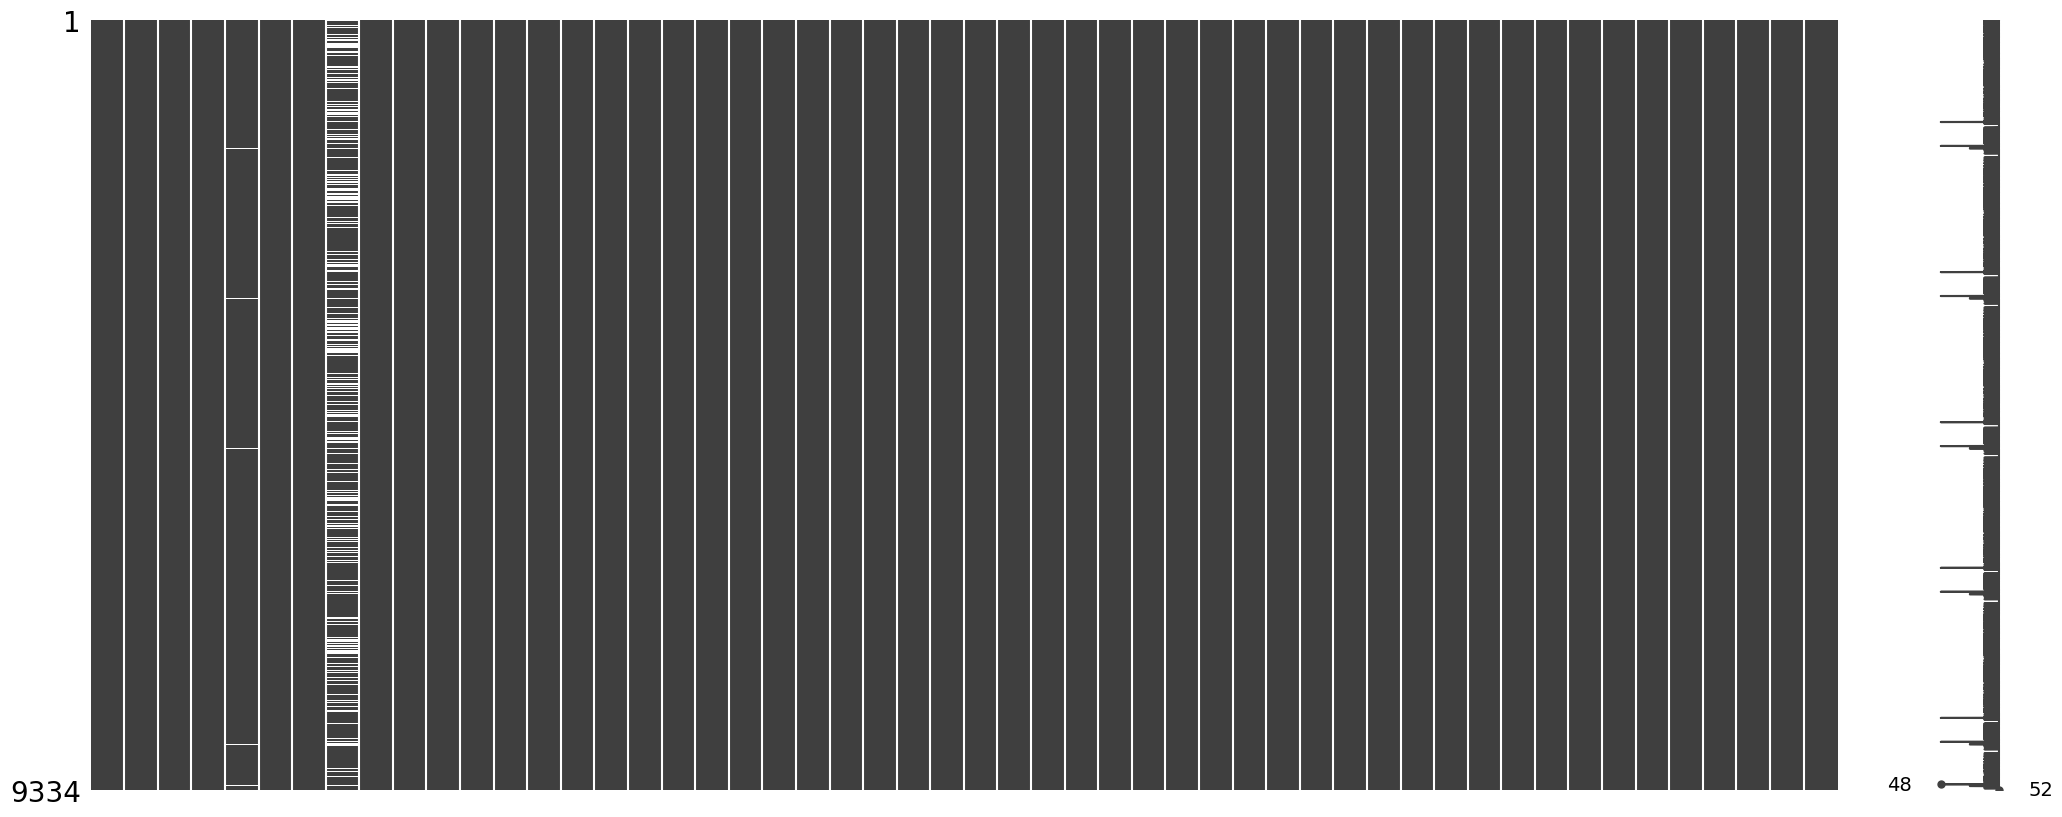

In [78]:
# Matrix plot of missing data
msno.matrix(df)

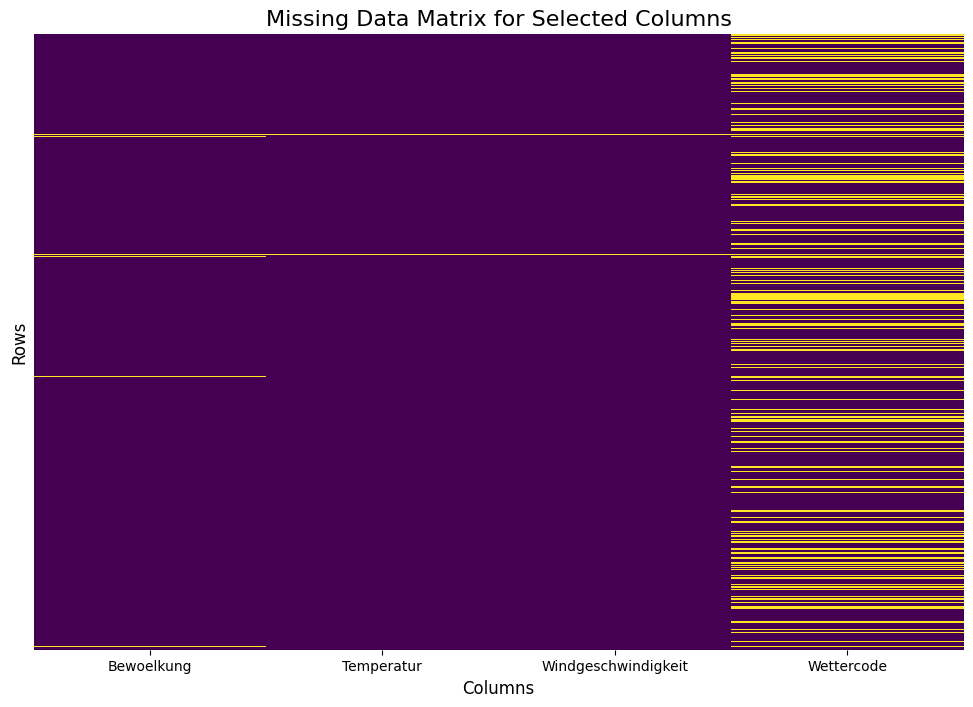

In [79]:
# Plot only columns with missing data
# Select columns with missing data
columns_to_plot = ['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode']
df_subset = df[columns_to_plot]

# define missing data
missing_data = df_subset.isnull()

# Plot the missing data matrix
plt.figure(figsize=(12, 8))
sns.heatmap(missing_data, cmap='viridis', cbar=False, yticklabels=False)

plt.title("Missing Data Matrix for Selected Columns", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)

# Show the plot
plt.show()

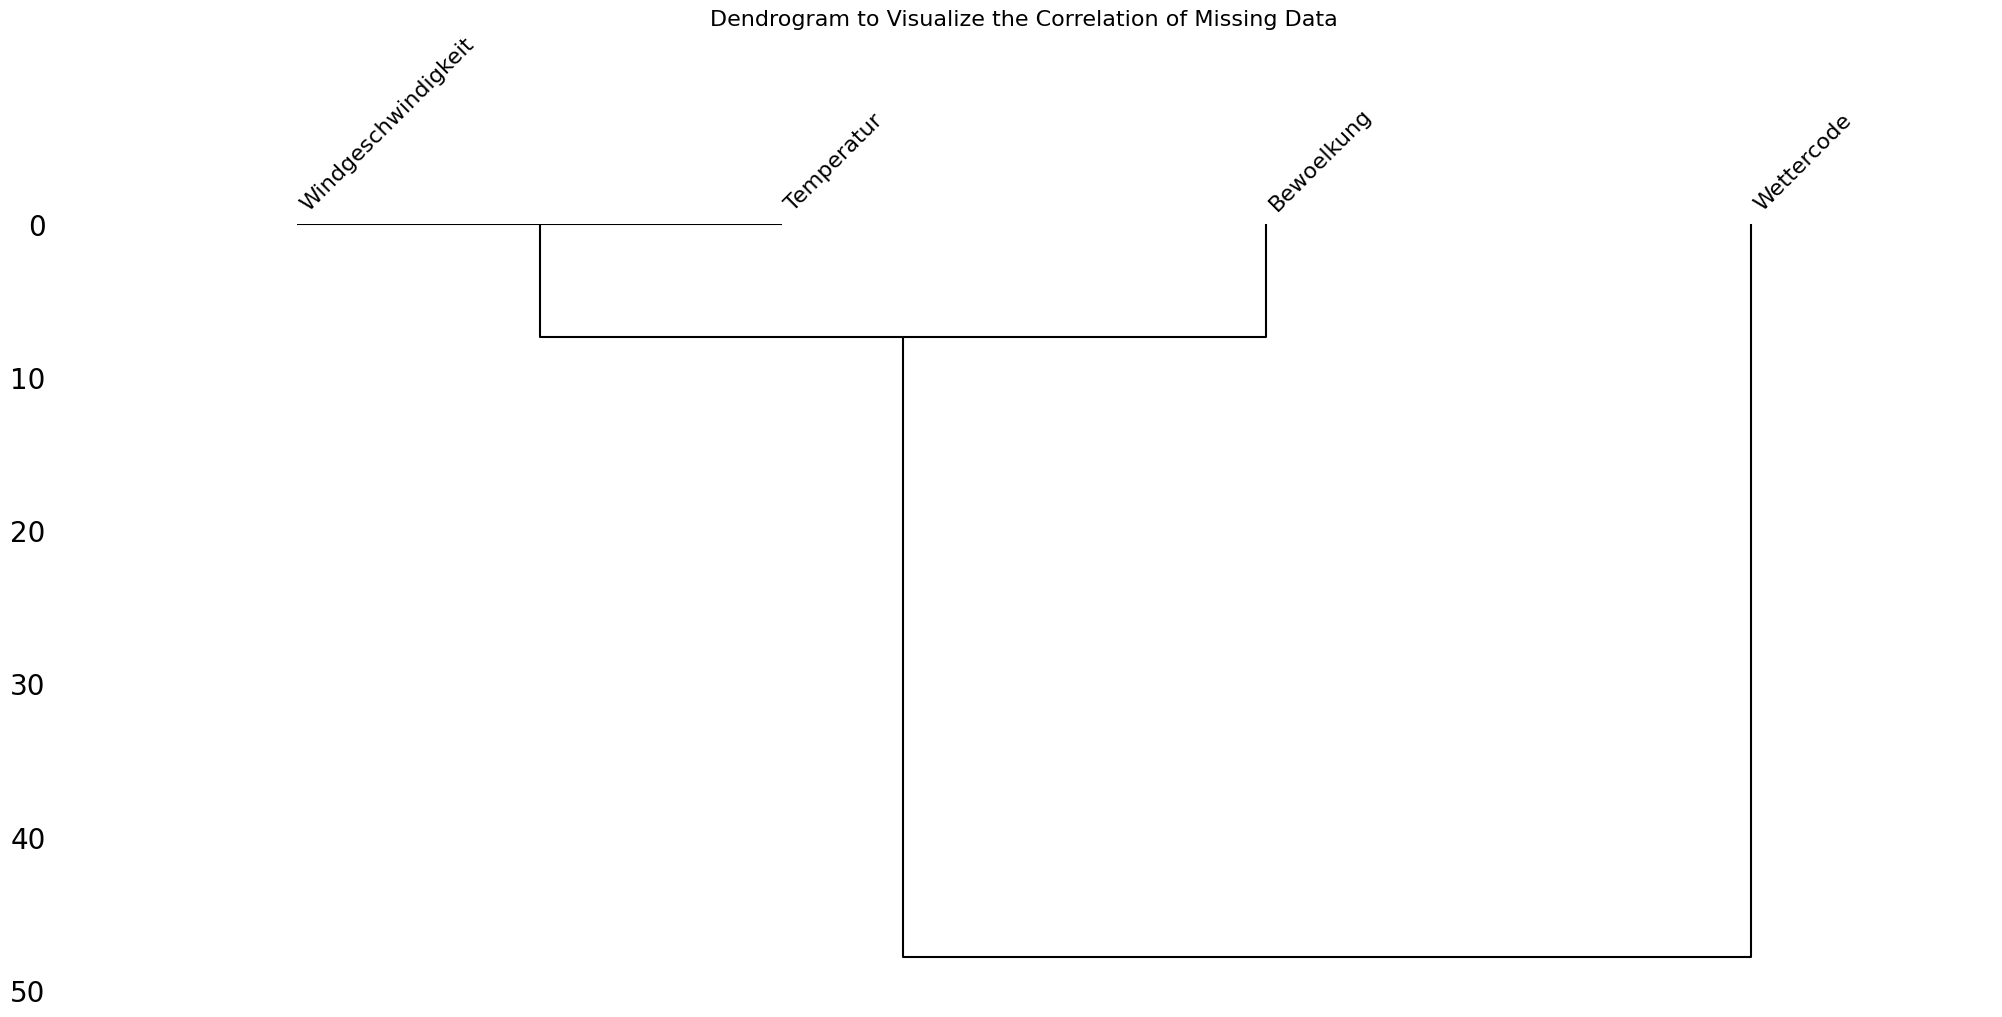

In [80]:
# Dendrogram to visualize the correlation of missing data for columns with missing data

# select the columns
df_subset = df[columns_to_plot]

# generate the dendrogram
msno.dendrogram(df_subset)
plt.title("Dendrogram to Visualize the Correlation of Missing Data", fontsize=16)
plt.show()

### Data Visualization

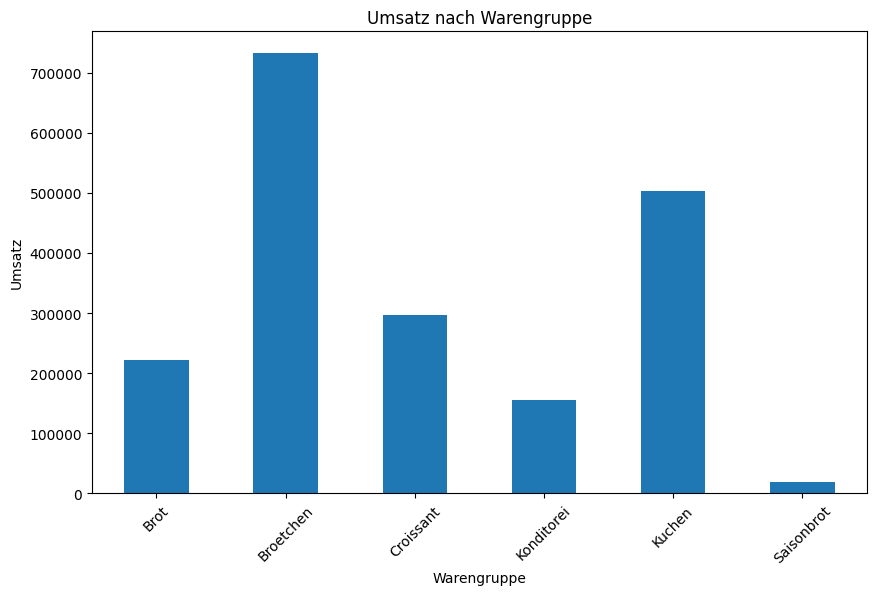

In [81]:
# plot "Umsatz" according to "Warengruppe"

## define the mapping of encoded values to Warengruppen names
warengruppen_mapping = {
    1: "Brot",
    2: "Broetchen",
    3: "Croissant",
    4: "Konditorei",
    5: "Kuchen",
    6: "Saisonbrot"
}

plt.figure(figsize=(10,6), facecolor= 'none')
df.groupby("Warengruppe")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Warengruppe")
plt.xlabel("Warengruppe")
plt.ylabel("Umsatz")

## replace the encoded values with the Warengruppen names
plt.xticks(ticks=[0,1,2,3,4,5], labels=[warengruppen_mapping[i] for i in range(1,7)], rotation=45)
plt.show()

### Umsatz ist für Brötchen am größten, für Saisonbrot am kleinsten (könnte daran liegen, dass Saisonbrot nur in wenigen Monaten verkauft wird)

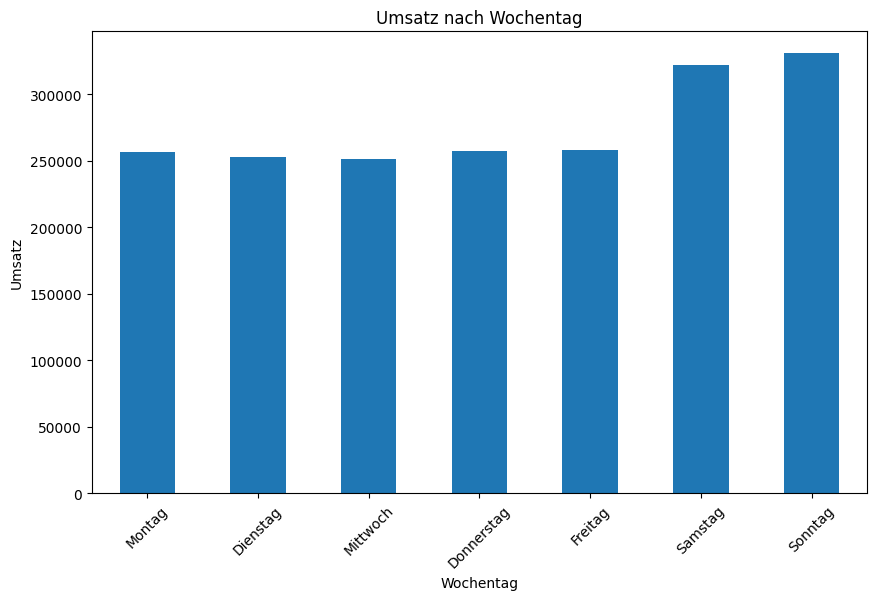

In [82]:
# plot "Umsatz" according to "Wochentag"

## define the mapping of encoded values to weekday names
weekday_mapping = {
    0: "Montag",
    1: "Dienstag",
    2: "Mittwoch",
    3: "Donnerstag",
    4: "Freitag",
    5: "Samstag",
    6: "Sonntag"
}

plt.figure(figsize=(10,6))
df.groupby("Wochentag")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Wochentag")
plt.xlabel("Wochentag")
plt.ylabel("Umsatz")

# Rename the x-axis labels
plt.xticks(ticks=range(7), labels=[weekday_mapping[i] for i in range(7)], rotation=45)

# show the plot
plt.show()

### die Umsätze scheinen am Wochenende am höchsten zu sein --> define new Variable "Wochenende" (0 = Montag bis Freitag, 1 = Samsstag oder Sonntag)

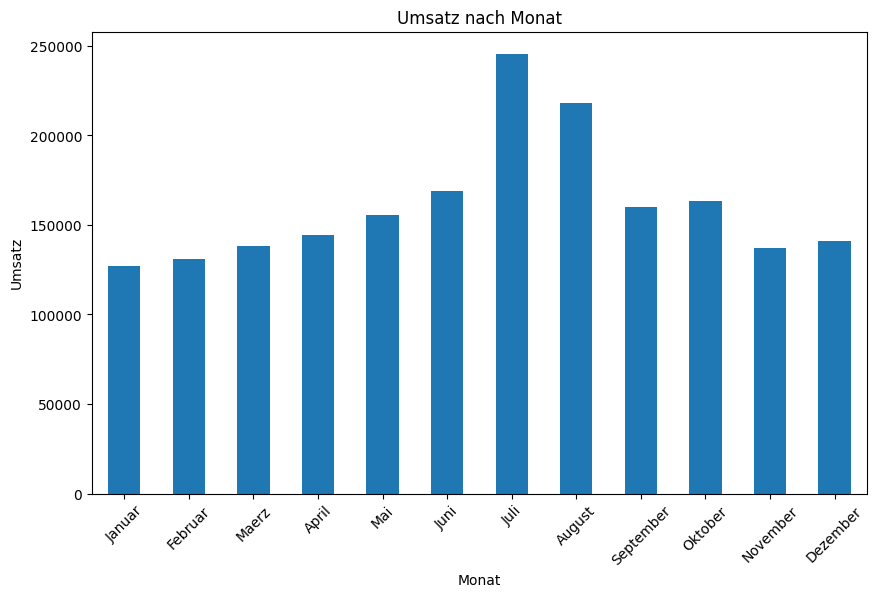

In [83]:
# plot "Umsatz" according to "Monat"

## define the mapping of encoded values to month names
month_mapping = {
    0: "Januar",
    1: "Februar",
    2: "Maerz",
    3: "April",
    4: "Mai",
    5: "Juni",
    6: "Juli",
    7: "August",
    8: "September",
    9: "Oktober",
    10: "November",
    11: "Dezember"
}

plt.figure(figsize=(10,6))
df.groupby("Monat")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Monat")
plt.xlabel("Monat")
plt.ylabel("Umsatz")

# Rename the x-axis labels
plt.xticks(ticks=range(12), labels=[month_mapping[i] for i in range(12)], rotation=45)

# show the plot
plt.show()

### Umsaetze sind im Sommer (Juli, August) am höchsten; ggfs. aufgrund der Sommerferien

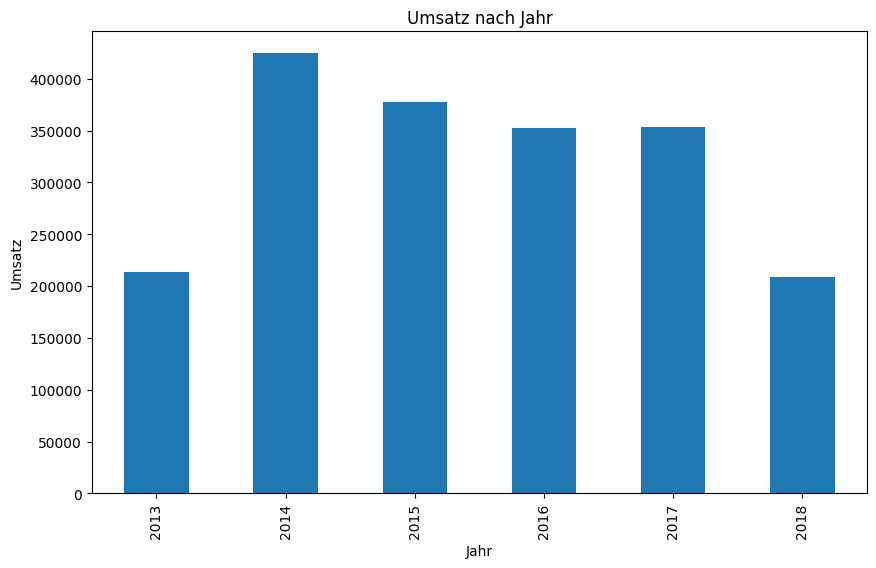

In [84]:
# plot "Umsatz" according to "Jahr"
plt.figure(figsize=(10,6))
df.groupby("Jahr")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Jahr")
plt.xlabel("Jahr")
plt.ylabel("Umsatz")
plt.show()

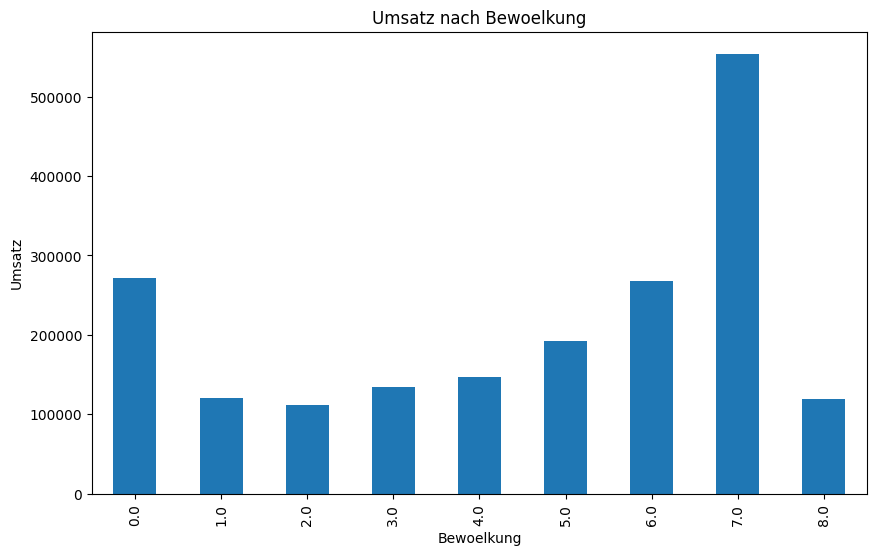

<Axes: xlabel='Bewoelkung'>

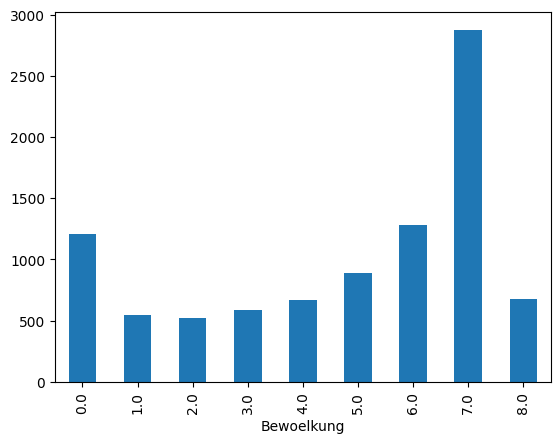

In [85]:
# plot "Umsatz" according to "Bewoelkung"
## Bewoelkung: "0" = "wolkenlos"; "1-2" = "heiter", "3" = "leicht bewoelkt", "4-6" = "wolkig", "7" = "stark bewökt", "8" = "bedeckt"
plt.figure(figsize=(10,6))
df.groupby("Bewoelkung")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Bewoelkung")
plt.xlabel("Bewoelkung")
plt.ylabel("Umsatz")
plt.show()

### die Bewölkung beeinflusst vermutlich nicht das Kaufverhalten der Kunden; in Kiel ist es einfach meist bewölkt
## plot occurences of "Bewoelkung" and order the values ascending
df["Bewoelkung"].value_counts().sort_index().plot(kind="bar")
### die Häufigkeit der Werte für "Bewoelkung" korreliert mit dem Umsatz --> vermutlich eine Korrelation und keine Kausalität

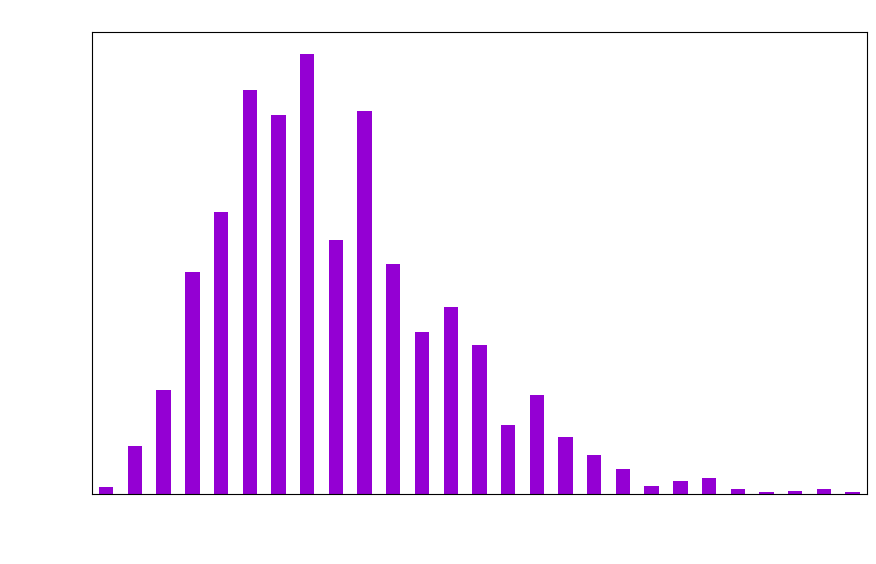

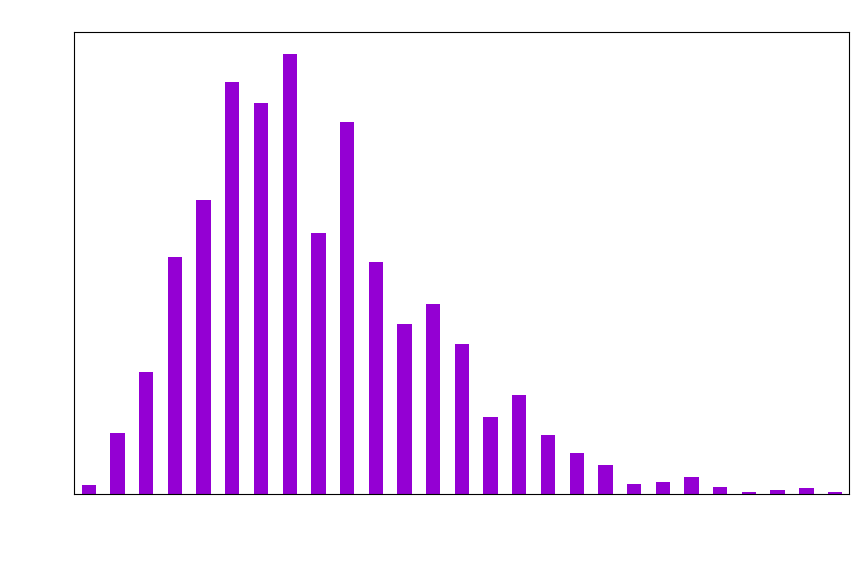

In [86]:
# plot "Umsatz" according to "Windgeschwindigkeit"
## Windgeschwindigkeit: "0-3" = "Sille bis leiser Zug", "4-6" = "leichte Brise",  "7-10" = "schwache Brise", "11-16" = "mäßige Brise", "17-21" = "frische Brise", "22-35" "starker Wind"
plt.figure(figsize=(10,6), facecolor= 'none')
ax1 = plt.gca()  # Aktuelle Achse holen
ax1.set_facecolor('none')  # Achsenhintergrund transparent machen

df.groupby("Windgeschwindigkeit")["Umsatz"].sum().plot(kind="bar", color = 'darkviolet')
plt.title("Umsatz nach Windgeschwindigkeit", color='white')
plt.xlabel("Windgeschwindigkeit", color='white')
plt.ylabel("Umsatz", color='white')

# x- und y-Tick-Farben ändern
ax1.tick_params(axis='x', colors='white')  # x-Achsen-Ticks in weiß
ax1.tick_params(axis='y', colors='white')  # y-Achsen-Ticks in weiß

plt.show()


# Plot der Häufigkeit der Werte in der Spalte "Windgeschwindigkeit"
plt.figure(figsize=(10, 6), facecolor='none')  # Transparenter Hintergrund für die gesamte Figur
ax = plt.gca()  # Aktuelle Achse holen
ax.set_facecolor('none')  # Hintergrund der Achsen transparent machen

df["Windgeschwindigkeit"].value_counts().sort_index().plot(kind="bar", color="darkviolet")  # Balkenfarbe auf darkviolet

# Titel und Achsenbeschriftungen mit weißer Schrift
plt.title("Häufigkeit nach Windgeschwindigkeit", color="white")
plt.xlabel("Windgeschwindigkeit", color="white")
plt.ylabel("Häufigkeit", color="white")

# x- und y-Tick-Farben auf weiß setzen
ax.tick_params(axis='x', colors='white')  # x-Achsen-Ticks in weiß
ax.tick_params(axis='y', colors='white')  # y-Achsen-Ticks in weiß

plt.show()

### auch hier gibt es eine Korrelatoin zwischen der Häufigkeit der Windgeschwindigkeiten und dem Umsatz --> vermutlich eine Korrelation und keine Kausalität

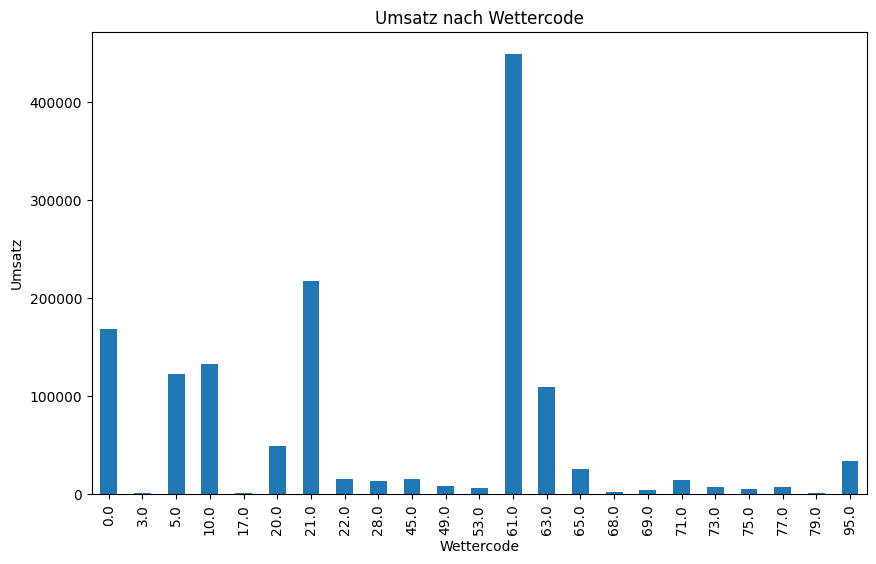

<Axes: xlabel='Wettercode'>

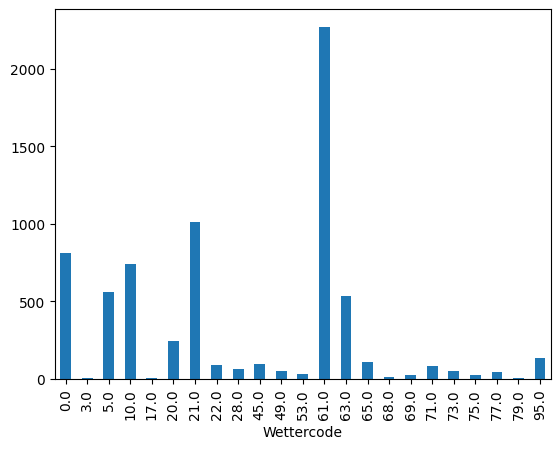

In [87]:
# plot "Umsatz" according to "Wettercode"
plt.figure(figsize=(10,6))
df.groupby("Wettercode")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Wettercode")
plt.xlabel("Wettercode")
plt.ylabel("Umsatz")
plt.show()

## plot occurences of each value in the column "Wettercode" and order the values ascending
df["Wettercode"].value_counts().sort_index().plot(kind="bar")
### auch hier gibt es eine Korrelatoin zwischen der Häufigkeit der Windgeschwindigkeiten und dem Umsatz --> vermutlich eine Korrelation und keine Kausalität

### Plots für selbst erstellte Variablen

In [88]:
# Plot für den Einfluss von Inflation (?) 
## InflationSensitivity: Brot, Brötchen, Saisonbrot = "high"; Croissant, Konditorei, Kuchen = "moderate"
## InflationKategorisierung (Effekt im Vergleich zum gleichen Monat des Vorjahres): high, moderate, low


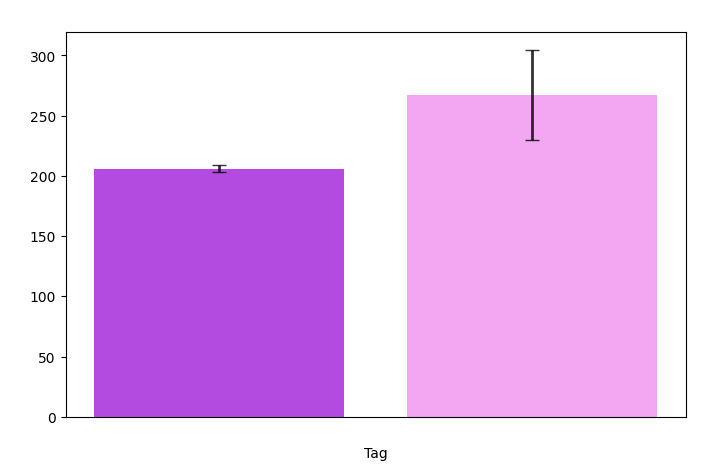

In [89]:
from scipy.stats import sem, t

# Effekt von Feiertagen 
## Feiertag ja/nein

# Gruppierung der Daten nach "Feiertag"
grouped = df.groupby("Feiertag")["Umsatz"]

# Durchschnittswerte berechnen
average_umsatz = grouped.mean()

# Konfidenzintervalle berechnen
confidence_level = 0.95
n = grouped.count()  # Anzahl der Datenpunkte pro Gruppe
std_err = grouped.apply(sem)  # Standardfehler der Mittelwerte
h = std_err * t.ppf((1 + confidence_level) / 2, n - 1)  # Halbbreite des Konfidenzintervalls

# Labels für die Kategorien
labels = ["Kein Feiertag", "Feiertag"]

# Plot erstellen
fig, ax = plt.subplots(figsize=(8, 5), facecolor='none')  # Hintergrund transparent
ax.set_facecolor('none')

# Balken-Plot zeichnen mit Fehlerbalken (Konfidenzintervalle)
bars = ax.bar(labels, average_umsatz, yerr=h, color=['darkviolet', 'violet'], alpha=0.7, capsize=5, error_kw={'elinewidth': 2, 'alpha': 0.8, 'color':'white'})

# Titel und Achsenbeschriftungen
ax.set_title("Durchschnittlicher Umsatz pro Feiertag bzw. an Tagen, die kein Feiertag sind", color='white')
ax.set_ylabel("Durchschnittlicher Umsatz", color='white')
ax.set_xlabel("Tag")

# X-Achsentick-Farbe auf weiß setzen
ax.tick_params(axis='x', colors='white')  # x-Achsen-Labels

# Werte über den Balken anzeigen (Textfarbe auf weiß setzen)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ci = h.iloc[i]  # Konfidenzintervall für die aktuelle Kategorie
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + ci + 0.1,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        color='white'
    )
    
# Werte über den Balken anzeigen
#for i, bar in enumerate(bars):
#    height = bar.get_height()
#    ci = h.iloc[i]  # Konfidenzintervall für die aktuelle Kategorie
#    ax.text(bar.get_x() + bar.get_width()/2, height + ci + 0.1, f'{height:.2f}', ha='center', va='bottom', color ='white')

# Plot anzeigen
plt.show()



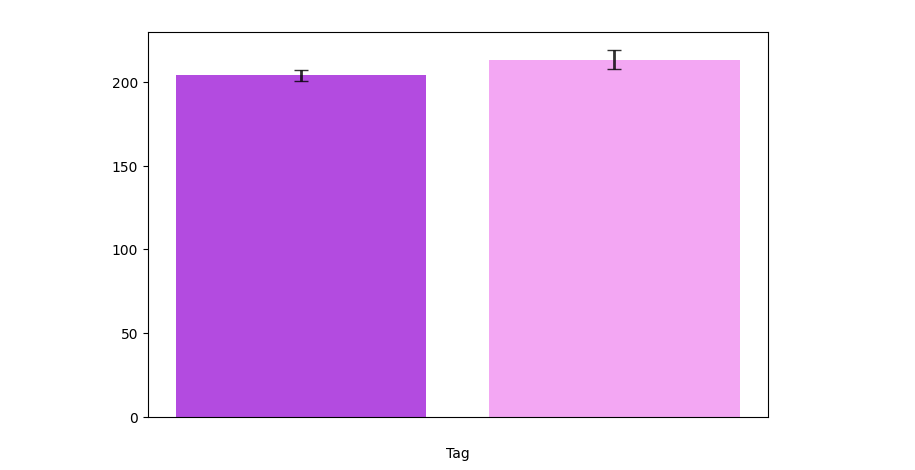

In [90]:
# plot für Paycheck Effect
## Paycheck Effect: 27. eines Monats bis 5. eines Folgemmonats

# Gruppierung der Daten nach "PaycheckEffect"
grouped = df.groupby("PaycheckEffect")["Umsatz"]

# Durchschnittswerte berechnen
average_umsatz = grouped.mean()

# Konfidenzintervalle berechnen
confidence_level = 0.95
n = grouped.count()  # Anzahl der Datenpunkte pro Gruppe
std_err = grouped.apply(sem)  # Standardfehler der Mittelwerte
h = std_err * t.ppf((1 + confidence_level) / 2, n - 1)  # Halbbreite des Konfidenzintervalls

# Labels für die Kategorien
labels = ["keine Gehaltsauszahlung", "Gehaltsauszahlung"]

# Plot erstellen
fig, ax = plt.subplots(figsize=(8, 5), facecolor='none')  # Hintergrund transparent
ax.set_facecolor('none')

# Balken-Plot zeichnen mit Fehlerbalken (Konfidenzintervalle)
bars = ax.bar(labels, average_umsatz, yerr=h, color=['darkviolet', 'violet'], alpha=0.7, capsize=5, error_kw={'elinewidth': 2, 'alpha': 0.8, 'color':'white'})

# Titel und Achsenbeschriftungen
ax.set_title("Durchschnittlicher Umsatz an Tagen, an denen Gehalt ausgezahlt wurde bzw. kein Gehalt ausgezahlt wurde", color='white')
ax.set_ylabel("Durchschnittlicher Umsatz", color='white')
ax.set_xlabel("Tag")

# X-Achsentick-Farbe auf weiß setzen
ax.tick_params(axis='x', colors='white')  # x-Achsen-Labels

# Werte über den Balken anzeigen (Textfarbe auf weiß setzen)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ci = h.iloc[i]  # Konfidenzintervall für die aktuelle Kategorie
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + ci + 0.1,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        color='white'
    )

# Plot anzeigen
plt.show()




### Investigating correlations

/tmp/ipykernel_2494/695406414.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_data['Jahreszeit'] = corr_data['Jahreszeit'].map(season_mapping)


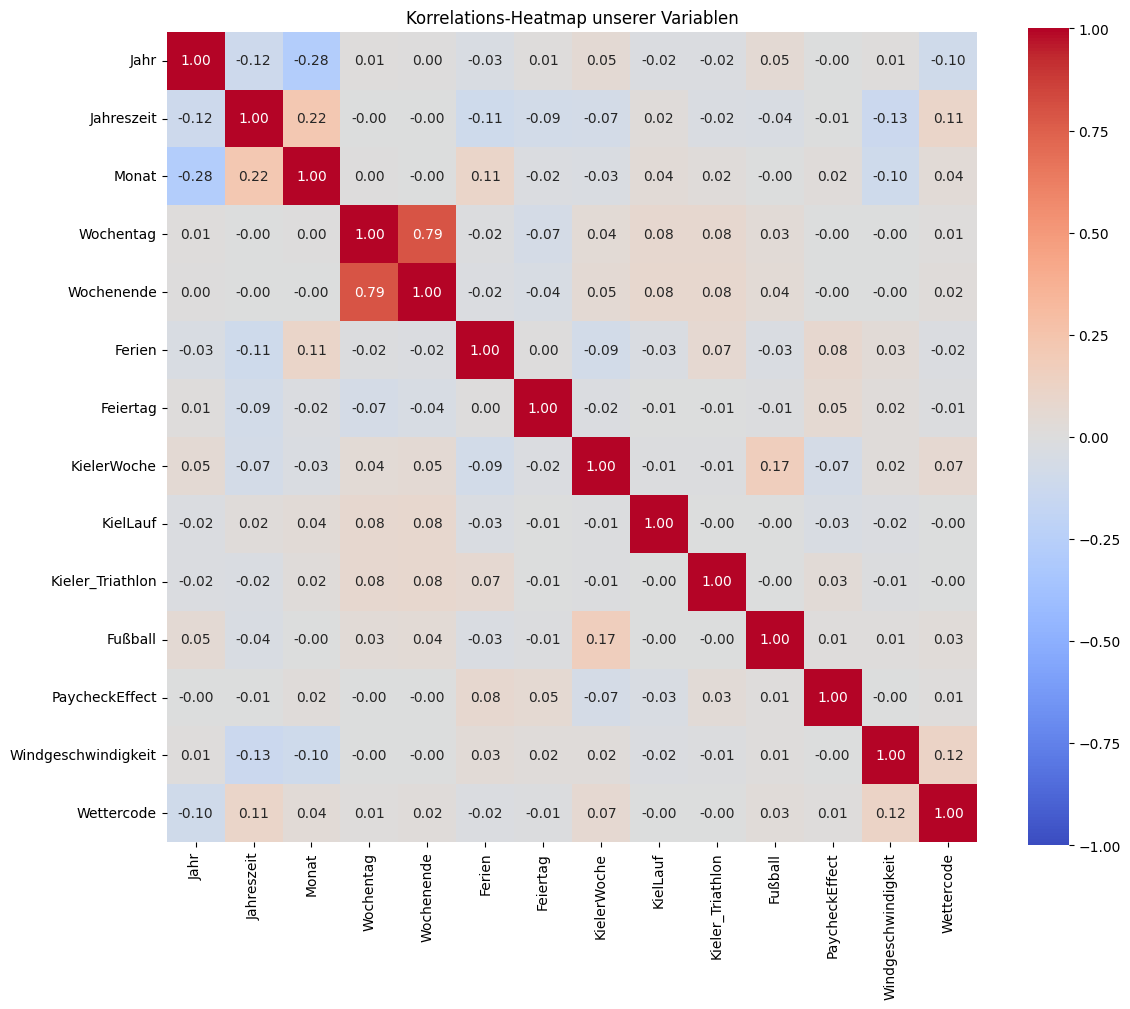

In [91]:
# Plotting einer Korrelationsmatrix ausgewaehlter Variablen

## define columns that should be included in the correlation matrix
# columns_to_select = ['Warengruppe', 'Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode', 'KielerWoche', 'Wochentag', 'Monat', 'Jahr', 'Jahreszeit', 'Ferien']
columns_to_select = ['Jahr', 'Jahreszeit', 'Monat', 'Wochentag', 'Wochenende', 'Ferien', 'Feiertag', 'KielerWoche', 'KielLauf', 'Kieler_Triathlon', 'Fußball', 'PaycheckEffect', 'Windgeschwindigkeit', 'Wettercode']


## noch nicht beinhaltet: 'Gefühl', 'InflationSensitivity', 'Inflation_Kategorisierung', 'Windkategorie', da nicht numerisch

## Create a new dataframe with the selected columns
corr_data = df[columns_to_select]

## Convert categorical variables into numerical values
season_mapping = {'Frühling': 0, 'Sommer': 1, 'Herbst': 2, 'Winter': 3}
corr_data['Jahreszeit'] = corr_data['Jahreszeit'].map(season_mapping)

# Assuming 'Gefühl' has values like 'Low', 'Medium', 'High'
#gefuehl_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
#corr_data['Gefühl'] = corr_data['Gefühl'].map(gefuehl_mapping)

# Ensure that all categorical variables are converted to numerical values
corr_data = corr_data.apply(pd.to_numeric, errors='coerce')

## Korrelationsmatrix berechnen
corr_matrix = corr_data.corr()

## Figure erstellen
plt.figure(figsize=(12, 10))

# Heatmap erstellen
sns.heatmap(
        corr_matrix,
        annot=True,  # Zeigt die Korrelationswerte an
        cmap='coolwarm',  # Farbschema: rot (positiv) bis blau (negativ)
        vmin=-1, vmax=1,  # Wertebereich der Korrelation
        center=0,  # Zentrum der Farbskala
        fmt='.2f',  # Zahlenformat (2 Dezimalstellen)
        square=True,  # Quadratische Zellen
    )

# Titel hinzufügen
plt.title('Korrelations-Heatmap unserer Variablen')

# Layout optimieren
plt.tight_layout()

plt.show()

